In [9]:
import os
from cmdstanpy import CmdStanModel
from pathlib import Path
import arviz as az

In [2]:

path = Path("models")
stanfile = path / "bernoulli.stan"

model = CmdStanModel(stan_file=stanfile)

/home/karinog/miniconda3/envs/cmdstanpy/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
22:20:54 - cmdstanpy - INFO - compiling stan file /home/karinog/work/study/09_cmdstanpy/models/bernoulli.stan to exe file /home/karinog/work/study/09_cmdstanpy/models/bernoulli
22:21:01 - cmdstanpy - INFO - compiled model executable: /home/karinog/work/study/09_cmdstanpy/models/bernoulli
22:21:01 - cmdstanpy - WARNING - Stan compiler has produced 1 warnings:
22:21:01 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/karinog/work/study/09_cmdstanpy/models/bernoulli.hpp /home/karinog/work/study/09_cmdstanpy/models/bernoulli.stan
Warning in '/home/karinog/work/study/09_cmdstanpy/models/bernoulli.stan', line 3, column 2: Declaration
    of arrays by placing brackets after a variable 

In [4]:
data = {
 "N" : 10,
 "y" : [0,1,0,0,0,0,0,0,0,1]
}
fit = model.sample(data=data)

22:21:48 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


22:21:48 - cmdstanpy - INFO - CmdStan done processing.


In [7]:
fit.stan_variable("theta")

array([0.256165, 0.404015, 0.325545, ..., 0.202279, 0.247935, 0.232557])

In [8]:
fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
lp__,-7.289270,0.017987,0.727979,-8.823760,-7.00650,-6.750170,1637.95,26851.7,1.00106
theta,0.255474,0.003270,0.122551,0.078781,0.24495,0.477006,1404.86,23030.5,1.00137


array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

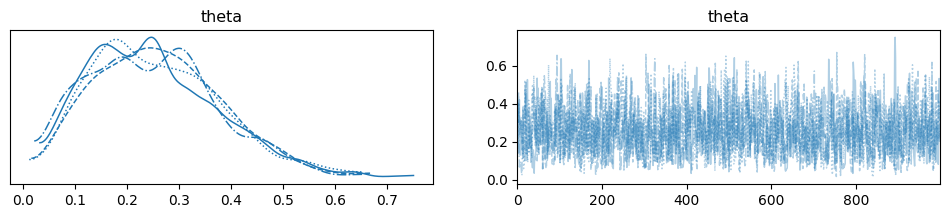

In [11]:
cmdstanpy_data = az.from_cmdstanpy(
    posterior=fit,
    log_likelihood="lp__",
)
az.plot_trace(cmdstanpy_data)